In [1]:
%cd C:\Users\anna-\Promotion\ML_Hackathon_2020\spatial-tools

C:\Users\anna-\Promotion\ML_Hackathon_2020\spatial-tools


### 0. Imports

In [2]:
import scanpy as sc
from spatial_tools import read_seqfish
from spatial_tools.graph import spatial_connectivity, cluster_centrality_scores, plot_cluster_centrality_scores

%load_ext autoreload
%autoreload 2
#%load_ext lab_black

# A. seqFISH

In [3]:
BASE_PATH = ''

### 1. Build spatial graphs

In [4]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

C:\Users\anna-\Anaconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

In [5]:
adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()

In [6]:
# use number of neighbors
spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

### 2. Calculate centrality scores

In [7]:
cluster_centrality_scores( 
    adata = adata_svz_5,
    connectivity_key = 'spatial_connectivity',
    clusters_key = 'louvain',
    save_networkx_graph = True
)

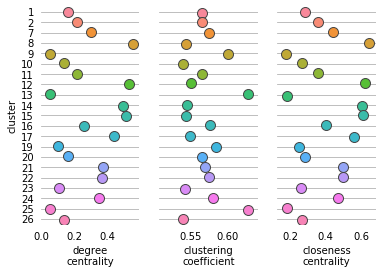

In [8]:
plot_cluster_centrality_scores(
    adata=adata_svz_5,
    centrality_scores_key='cluster_centrality_scores'
)

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\anna-\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This locat

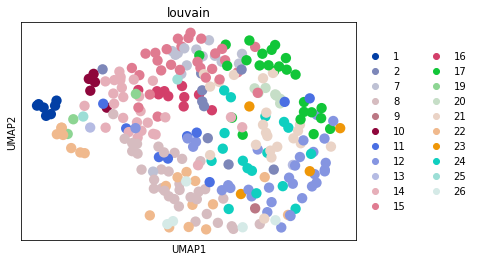

In [9]:
sc.pp.neighbors(adata_svz_5)
sc.tl.umap(adata_svz_5)
sc.pl.umap(adata_svz_5, color='louvain')

In [49]:
import networkx as nx
import numpy as np

In [32]:
graph = adata_svz_5.uns['networkx_graph']

In [39]:
node_attributes = {i: {'louvain':str(x)} for i, x in enumerate(adata_svz_5.obs['louvain'].tolist())}

In [41]:
nx.set_node_attributes(graph, node_attributes)

In [52]:
connections = list(nx.node_attribute_xy(graph, "louvain"))

In [58]:
from collections import Counter

In [62]:
Counter(connections).most_common()

[(('8', '8'), 76),
 (('12', '17'), 57),
 (('17', '12'), 57),
 (('12', '12'), 50),
 (('8', '12'), 47),
 (('12', '8'), 47),
 (('7', '7'), 46),
 (('14', '14'), 44),
 (('15', '15'), 42),
 (('22', '22'), 42),
 (('21', '12'), 41),
 (('15', '12'), 41),
 (('12', '15'), 41),
 (('12', '21'), 41),
 (('8', '14'), 40),
 (('17', '17'), 40),
 (('14', '8'), 40),
 (('8', '21'), 39),
 (('21', '8'), 39),
 (('17', '14'), 35),
 (('14', '17'), 35),
 (('8', '17'), 34),
 (('12', '24'), 34),
 (('14', '12'), 34),
 (('24', '12'), 34),
 (('12', '14'), 34),
 (('17', '8'), 34),
 (('16', '16'), 34),
 (('22', '8'), 33),
 (('8', '22'), 33),
 (('8', '15'), 30),
 (('15', '8'), 30),
 (('1', '1'), 30),
 (('15', '17'), 28),
 (('17', '15'), 28),
 (('14', '15'), 28),
 (('15', '14'), 28),
 (('21', '15'), 26),
 (('21', '17'), 26),
 (('15', '21'), 26),
 (('21', '24'), 26),
 (('17', '21'), 26),
 (('24', '21'), 26),
 (('22', '12'), 25),
 (('12', '22'), 25),
 (('24', '8'), 25),
 (('8', '24'), 25),
 (('7', '10'), 25),
 (('10', '7')

In [51]:
values, counts = np.unique(connections, return_counts=True)
print(values, counts)

['1' '10' '11' '12' '13' '14' '15' '16' '17' '19' '2' '20' '21' '22' '23'
 '24' '25' '26' '7' '8' '9'] [152 120 242 780  46 638 648 230 626  68 212 150 502 420  94 422  46 118
 322 868  24]


In [17]:
eigenvector_centrality = nx.eigenvector_centrality(adata_svz_5.uns['networkx_graph'], max_iter=1000)

In [19]:
sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

[(129, 0.19344735189339052),
 (0, 0.19146146741799944),
 (63, 0.19080190296751298),
 (49, 0.18893038278029045),
 (120, 0.16950507596202363),
 (51, 0.16611878200786992),
 (60, 0.16483640878143796),
 (1, 0.16443602938710128),
 (48, 0.16041502642523972),
 (119, 0.15632859441775868),
 (124, 0.15592806590885186),
 (127, 0.15167240530819748),
 (123, 0.146577626062908),
 (58, 0.142256000751207),
 (128, 0.13965301214168765),
 (57, 0.1381244515536969),
 (50, 0.13674576010472522),
 (125, 0.13207665609868346),
 (133, 0.12363837419803692),
 (126, 0.12108209004414425),
 (121, 0.12040194042681304),
 (131, 0.11820117391937637),
 (134, 0.11794808224869263),
 (52, 0.11477501320839152),
 (137, 0.11410772940941467),
 (122, 0.11290138431795237),
 (132, 0.1128062522155016),
 (130, 0.11041135860639134),
 (117, 0.10886018158249833),
 (118, 0.10601067609041007),
 (136, 0.10589625842915276),
 (62, 0.10161461008263097),
 (116, 0.09984977638080797),
 (135, 0.09937143294859035),
 (201, 0.09816328484863669),
 (139

In [26]:
nx.degree_assortativity_coefficient(adata_svz_5.uns['networkx_graph'], [100])

0.13265842466642797

# B. Visium

In [10]:
dataset_name = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
dataset_folder = ""

In [11]:
adata = sc.read_visium(dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
[1m[1mFailed in nopython mode pipeline (step: nopython mode backend)
LLVM IR parsing error
<string>:4079:36: error: '%.2747' defined with type 'i64' but expected 'i32'
  %".2748" = icmp eq i32 %".2746", %".2747"
                                   ^

[1m
File "..\..\..\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py", line 399:[0m
[1mdef top_segment_proportions_sparse_csr(data, indptr, ns):
    <source elided>
    partitioned = np.zeros((indptr.size - 1, maxidx), dtype=data.dtype)
[1m    for i in numba.prange(indptr.size - 1):
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: lowering "id=16[LoopNest(index_variable = parfor_index.491, range = (0, $122binary_subtract.5, 1))]{130: <ir.Block at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (399)>, 400: <ir.Block at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (405)>, 402: <ir.Block at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (406)>, 276: <ir.Block at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (403)>, 318: <ir.Block at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (404)>}Var(parfor_index.491, _qc.py:399)" at C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\preprocessing\_qc.py (399)[0m

In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

In [ ]:
spatial_connectivity(adata, obsm='X_spatial', n_rings=3)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='leiden')

In [ ]:
cluster_centrality_scores( 
    adata = adata,
    connectivity_key = 'spatial_connectivity',
    clusters_key = 'leiden',
    save_networkx_graph = True
)

In [ ]:
plot_cluster_centrality_scores(
    adata=adata,
    centrality_scores_key='cluster_centrality_scores'
)